In [1]:
# useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


# Logistic Regression
## Classification Using Linear Regression
Load data.

In [3]:
from logisticRegression.helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
data_size = len(height)
num_features = 2

x = np.empty((data_size, num_features))
y = gender
x[:, 0] = height
x[:, 1] = weight



y, x = sample_data(y, x, seed, size_samples=200)
x, mean_x, std_x = standardize(x)

In [4]:
from leastSquares.least_squares import least_squares
from logisticRegression.plots import visualization

def least_square_classification_demo(y, x):
    """classify the data by linear regression"""
    N, D = x.shape
    
    tx = np.empty((N, D+1))
    tx[:, 0]  = np.ones((N,))
    tx[:, 1:] = x
    mse_star, w = least_squares(y, tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")

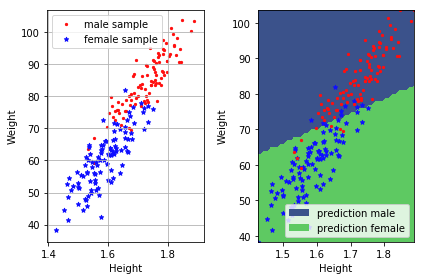

In [5]:
least_square_classification_demo(y, x)

In [6]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t) / (1+np.exp(t))

In [7]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    Xw = tx@w
    return np.sum( np.log(1 + np.exp(Xw)) - (Xw) * y)

In [8]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T @ (sigmoid(tx@w) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [9]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """   
    gradient = calculate_gradient(y, tx, w)
    w = w - gamma*gradient
    loss = calculate_loss(y, tx, w)
    return loss, w

In [10]:
def gradient_descent(y, x, w_initial, max_iter=100, gamma=.05):
    """Returns loss and weight """
    N, D = x.shape
    
    tx = np.empty((N, D+1))
    tx[:, 0]  = np.ones((N,))
    tx[:, 1:] = x
    
    ls = [calculate_loss(y, tx, w_initial)]
    ws = [w_initial]
    for i in range(max_iter):
        l, w = learning_by_gradient_descent(y, tx, ws[-1], gamma)
        # update
        ls.append(l)
        ws.append(w)
    w_star = ws[-1]
    l_star = ls[-1]
    
    return l_star, w_star

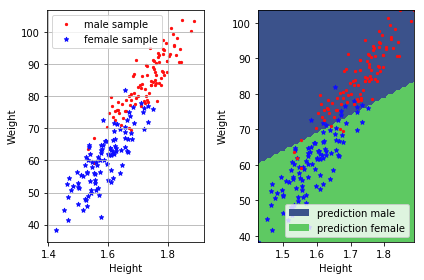

In [11]:
w_initial = np.array([0, 0, 0])
l_star, w_star = gradient_descent(y, x, w_initial)
visualization(y, x, mean_x, std_x, w_star, "classification_by_logistic_regression")